# ドル指数 週足 メジアン統計

In [1]:
import datetime
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [2]:
code = "DX-Y.NYB"
symbol = code
ticker = yf.Ticker(symbol)

In [3]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period="10y", interval="1wk")

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y = datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00-05:00,101.989998,102.430000,101.500000,101.930000,0,0.0,0.0
2023-01-30 00:00:00-05:00,101.919998,103.010002,100.820000,102.919998,0,0.0,0.0
2023-02-06 00:00:00-05:00,103.010002,103.959999,102.639999,103.629997,0,0.0,0.0
2023-02-13 00:00:00-05:00,103.580002,104.669998,102.589996,103.860001,0,0.0,0.0
2023-02-20 00:00:00-05:00,103.879997,105.320000,103.760002,105.209999,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-22 00:00:00-05:00,98.669998,98.730003,97.750000,98.019997,0,0.0,0.0
2025-12-29 00:00:00-05:00,98.050003,98.500000,97.919998,98.419998,0,0.0,0.0
2026-01-05 00:00:00-05:00,98.480003,99.260002,98.160004,99.129997,0,0.0,0.0


In [4]:
dt = df.tail(1).index[0]
year_str = f"{dt.year:04d}"
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'0119'

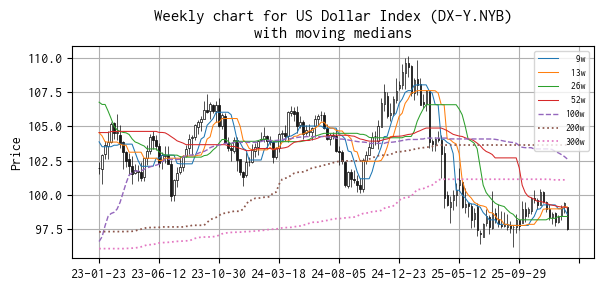

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

mm09 = df0["Close"].rolling(9).median()
mm13 = df0["Close"].rolling(13).median()
mm26 = df0["Close"].rolling(26).median()
mm52 = df0["Close"].rolling(52).median()
mm100 = df0["Close"].rolling(100).median()
mm200 = df0["Close"].rolling(200).median()
mm300 = df0["Close"].rolling(300).median()
apds = [
    mpf.make_addplot(mm09[df.index], width=0.75, label="  9w", ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=" 13w", ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=" 26w", ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=" 52w", ax=ax),
    mpf.make_addplot(
        mm100[df.index], width=1, linestyle="dashed", label="100w", ax=ax
    ),
    mpf.make_addplot(
        mm200[df.index],
        width=1.25,
        linestyle="dotted",
        label="200w",
        ax=ax,
    ),
    mpf.make_addplot(
        mm300[df.index],
        width=1.25,
        linestyle="dotted",
        label="300w",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=False,
    datetime_format="%y-%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title(
    "Weekly chart for %s (%s)\nwith moving medians" % (ticker.info["longName"], symbol)
)

ax.legend(loc="best", fontsize=7)
ax.grid()

plt.tight_layout()
plt.savefig(os.path.join(year_str, f"{date_str}_report_weekly_chart_robust_{code}.png"))
plt.show()

In [6]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-19 00:00:00-05:00,99.139999,99.139999,97.425003,97.485001,0,0.0,0.0


In [7]:
df.tail(2)["Close"]

Date
2026-01-12 00:00:00-05:00    99.389999
2026-01-19 00:00:00-05:00    97.485001
Name: Close, dtype: float64

In [8]:
df.tail(2)["Close"].diff()

Date
2026-01-12 00:00:00-05:00         NaN
2026-01-19 00:00:00-05:00   -1.904999
Name: Close, dtype: float64

## Robust Bollinger bands

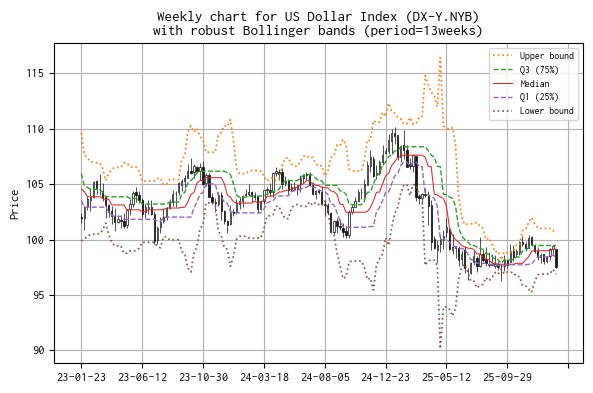

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig, ax = plt.subplots(figsize=(6, 4))

# Bollinger bands
period = 13
mv_median = df0["Close"].rolling(period).median()
mv_q1 = df0["Close"].rolling(period).quantile(0.25)
mv_q3 = df0["Close"].rolling(period).quantile(0.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds = [
    mpf.make_addplot(
        mv_upper[df.index],
        width=1.25,
        color="C1",
        linestyle="dotted",
        label="Upper bound",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_q3[df.index],
        width=1,
        color="C2",
        linestyle="dashed",
        label="Q3 (75%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_median[df.index], width=0.75, color="C3", label="Median", ax=ax
    ),
    mpf.make_addplot(
        mv_q1[df.index],
        width=1,
        color="C4",
        linestyle="dashed",
        label="Q1 (25%)",
        ax=ax,
    ),
    mpf.make_addplot(
        mv_lower[df.index],
        width=1.25,
        color="C5",
        linestyle="dotted",
        label="Lower bound",
        ax=ax,
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    addplot=apds,
    datetime_format="%y-%m-%d",
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc="best", fontsize=7)

try:
    ax.set_title(
        "Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)"
        % (ticker.info["longName"], symbol, period)
    )
except KeyError:
    ax.set_title(
        "Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)"
        % (symbol, period)
    )

plt.tight_layout()
plt.savefig(
    os.path.join(
        year_str, f"{date_str}_report_weekly_chart_bollinger_robust_{code}.png"
    )
)
plt.show()

## ヒストグラム

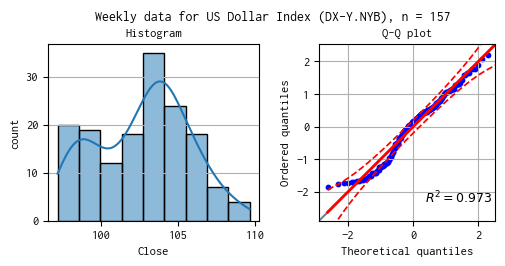

In [10]:
plt.rcParams["font.size"] = 9

fig, axes = plt.subplots(1, 2, figsize=(6, 2.5))

sns.histplot(df["Close"], kde=True, ax=axes[0])

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis="y")
axes[0].set_title("Histogram", fontsize=9)

# Q-Q プロット
pg.qqplot(df["Close"], s=10, ax=axes[1])
axes[1].set_title("Q-Q plot", fontsize=9)
axes[1].grid()

plt.suptitle(
    "Weekly data for %s (%s), n = %d" % (ticker.info["longName"], symbol, len(df)),
    fontsize=10,
)
plt.subplots_adjust(top=0.84, bottom=0.135, wspace=0.2)
plt.savefig(
    os.path.join(year_str, f"{date_str}_report_weekly_histogram_qqplot_{code}.png")
)
plt.show()